## Comparing the time series data with GARCH models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [2]:
# Load data
copper = pd.read_csv('data/Cobalt_prices_2017-01-01_to_2024-12-31_merged.csv', header=0, index_col=0)
lithium = pd.read_csv('data/Lithium_prices_2017-01-01_to_2024-12-31_merged.csv', header=0, index_col=0)
nickel = pd.read_csv('data/Nickel_prices_2017-01-01_to_2024-12-31_merged.csv', header=0, index_col=0)
cobalt = pd.read_csv('data/Copper_prices_2017-01-01_to_2024-12-31_merged.csv', header=0, index_col=0)

In [3]:
# Remove rows with duplicate dates
copper = copper[~copper.index.duplicated(keep='first')]
lithium = lithium[~lithium.index.duplicated(keep='first')]
nickel = nickel[~nickel.index.duplicated(keep='first')]
cobalt = cobalt[~cobalt.index.duplicated(keep='first')]

In [4]:
# Index is a date. Make sure the dates are in the correct order
copper.index = pd.to_datetime(copper.index)
lithium.index = pd.to_datetime(lithium.index)
nickel.index = pd.to_datetime(nickel.index)
cobalt.index = pd.to_datetime(cobalt.index)
# Sort the dataframes by index
copper.sort_index(inplace=True)
lithium.sort_index(inplace=True)
nickel.sort_index(inplace=True)
cobalt.sort_index(inplace=True)

In [5]:
# Calculate returns
copper_returns = copper['Price'].pct_change().dropna()
lithium_returns = lithium['Price'].pct_change().dropna()
nickel_returns = nickel['Price'].pct_change().dropna()
cobalt_returns = cobalt['Price'].pct_change().dropna()

### Fitting GARCH models to the time series data

Copper

In [6]:
copper_garch = arch_model(copper_returns, vol='Garch', p=1, q=1)
copper_results = copper_garch.fit()
print(copper_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6035286231.224902
Iteration:      2,   Func. Count:     18,   Neg. LLF: 18247.337779314184
Iteration:      3,   Func. Count:     28,   Neg. LLF: 9666693.494370129
Iteration:      4,   Func. Count:     39,   Neg. LLF: -5565.899623282181
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5565.899627861101
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5565.90
Distribution:                  Normal   AIC:                          -11123.8
Method:            Maximum Likelihood   BIC:                          -11101.3
                            

/Users/michal/miniconda3/envs/metal/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003479. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Scaling the data due to the small value of $y$.

In [7]:
copper_returns_scaled = copper_returns * 100
copper_garch_scaled = arch_model(copper_returns_scaled, vol='Garch', p=1, q=1)
copper_results_scaled = copper_garch_scaled.fit()
print(copper_results_scaled.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9984.075266885086
Iteration:      2,   Func. Count:     14,   Neg. LLF: 35856.974517393064
Iteration:      3,   Func. Count:     21,   Neg. LLF: 4049.1147938392605
Iteration:      4,   Func. Count:     29,   Neg. LLF: 3955.7130963296113
Iteration:      5,   Func. Count:     35,   Neg. LLF: 3927.683454719412
Iteration:      6,   Func. Count:     41,   Neg. LLF: 4015.5143337068153
Iteration:      7,   Func. Count:     47,   Neg. LLF: 3903.657534557417
Iteration:      8,   Func. Count:     52,   Neg. LLF: 3903.5660539729524
Iteration:      9,   Func. Count:     57,   Neg. LLF: 3903.5489536927685
Iteration:     10,   Func. Count:     62,   Neg. LLF: 3903.5481019751332
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3903.547906329847
Iteration:     12,   Func. Count:     71,   Neg. LLF: 3903.5479063288576
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3903.547906329847
            Iteratio

Lithium

In [8]:
lithium_garch = arch_model(lithium_returns, vol='Garch', p=1, q=1)
lithium_results = lithium_garch.fit()
print(lithium_results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: -4159.118490612896
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4159.118493382306
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4159.12
Distribution:                  Normal   AIC:                          -8310.24
Method:            Maximum Likelihood   BIC:                          -8288.06
                                        No. Observations:                 1890
Date:                Fri, May 02 2025   Df Residuals:                     1889
Time:                        14:16:11   Df Model:                            1
         

/Users/michal/miniconda3/envs/metal/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001896. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Scaling the lithium data due to the small value of $y$.

In [9]:
lithium_returns_scaled = lithium_returns * 100
lithium_garch_scaled = arch_model(lithium_returns_scaled, vol='Garch', p=1, q=1)
lithium_results_scaled = lithium_garch_scaled.fit()
print(lithium_results_scaled.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12809398640.86681
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5453.906509395694
Iteration:      3,   Func. Count:     20,   Neg. LLF: 12723.238505119092
Iteration:      4,   Func. Count:     26,   Neg. LLF: 12738.587963124422
Iteration:      5,   Func. Count:     32,   Neg. LLF: 12743.362367314694
Iteration:      6,   Func. Count:     38,   Neg. LLF: 9947.092142558504
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4625.761403017048
Iteration:      8,   Func. Count:     50,   Neg. LLF: 4979.357223406332
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4549.06182855493
Iteration:     10,   Func. Count:     63,   Neg. LLF: 4531.375938752613
Iteration:     11,   Func. Count:     68,   Neg. LLF: 4528.006755495211
Iteration:     12,   Func. Count:     73,   Neg. LLF: 4527.336738913851
Iteration:     13,   Func. Count:     78,   Neg. LLF: 4525.647569244526
Iteration:     14,   Func. Count:     83,   Neg. LLF: 4525.513

Nickel - already scaled

In [10]:
nickel_returns_scaled = nickel_returns * 100
nickel_garch = arch_model(nickel_returns_scaled, vol='Garch', p=1, q=1)
nickel_results = nickel_garch.fit()
print(nickel_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11099.860018370611
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3027343.5945485374
Iteration:      3,   Func. Count:     20,   Neg. LLF: 4641.879791696636
Iteration:      4,   Func. Count:     27,   Neg. LLF: 4435.250338574953
Iteration:      5,   Func. Count:     32,   Neg. LLF: 5272.068523994327
Iteration:      6,   Func. Count:     39,   Neg. LLF: 4434.363047838537
Iteration:      7,   Func. Count:     44,   Neg. LLF: 4433.713878232975
Iteration:      8,   Func. Count:     49,   Neg. LLF: 4433.660038316371
Iteration:      9,   Func. Count:     54,   Neg. LLF: 4433.65665373985
Iteration:     10,   Func. Count:     59,   Neg. LLF: 4433.656627867445
Iteration:     11,   Func. Count:     64,   Neg. LLF: 4433.65662609429
Iteration:     12,   Func. Count:     68,   Neg. LLF: 4433.656626094347
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4433.65662609429
            Iterations: 12
  

Cobalt - scaled

In [11]:
cobalt_returns_scaled = cobalt_returns * 100
cobalt_garch = arch_model(cobalt_returns_scaled, vol='Garch', p=1, q=1)
cobalt_results = cobalt_garch.fit()
print(cobalt_results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8713.70896235934
Iteration:      2,   Func. Count:     14,   Neg. LLF: 500619.042006116
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1169535308.0399816
Iteration:      4,   Func. Count:     28,   Neg. LLF: 3645.827425857963
Iteration:      5,   Func. Count:     34,   Neg. LLF: 3603.427077387062
Iteration:      6,   Func. Count:     40,   Neg. LLF: 3600.1084342925706
Iteration:      7,   Func. Count:     45,   Neg. LLF: 3600.041749832917
Iteration:      8,   Func. Count:     50,   Neg. LLF: 3600.0397186165865
Iteration:      9,   Func. Count:     55,   Neg. LLF: 3600.039688053161
Iteration:     10,   Func. Count:     60,   Neg. LLF: 3600.039687442929
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3600.039687442929
            Iterations: 10
            Function evaluations: 60
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results              

In [12]:
#print all of nickel's returns, nothing should be collapsed
print(nickel_returns)

Date
2017-01-03    0.023675
2017-01-04   -0.022544
2017-01-05    0.025584
2017-01-06   -0.004398
2017-01-09    0.005891
                ...   
2024-12-25    0.000328
2024-12-26    0.000000
2024-12-27   -0.008083
2024-12-30    0.004886
2024-12-31   -0.003561
Name: Price, Length: 2062, dtype: float64


## Compare the GARCH models


=== GARCH Model Comparison ===
     Metal     Omega  Alpha[1]   Beta[1]  Persistence           AIC  \
2   Nickel  0.609680  0.351531  0.612957     0.964488   8875.313252   
0   Copper  0.000035  0.100012  0.799989     0.900001 -11123.799256   
1  Lithium  0.000190  0.200000  0.700000     0.900000  -8310.236987   
3   Cobalt  0.447167  0.125914  0.658260     0.784174   7208.079375   

            BIC  
2   8897.838979  
0 -11101.279353  
1  -8288.059658  
3   7230.597335  


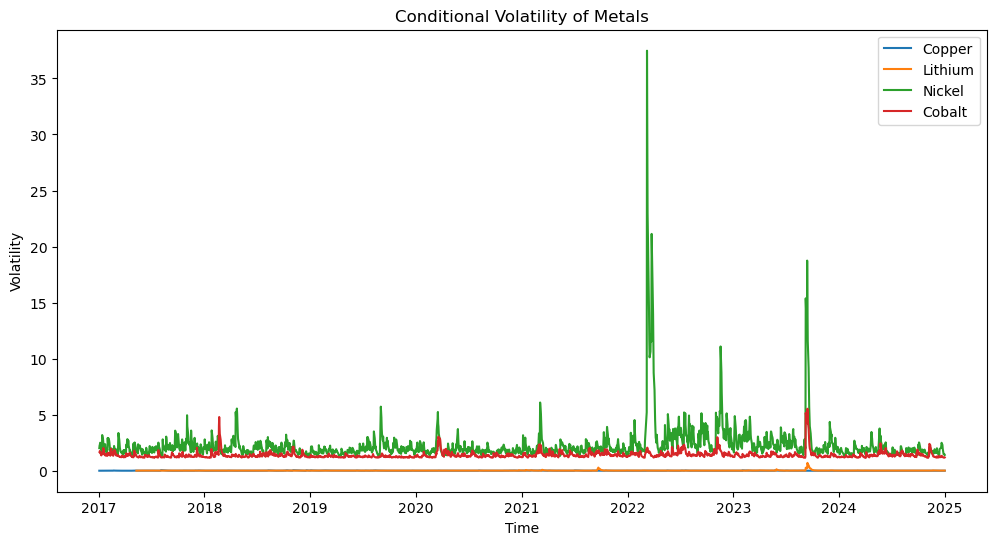

In [13]:
models = {
    "Copper": copper_results,
    "Lithium": lithium_results,
    "Nickel": nickel_results,
    "Cobalt": cobalt_results
}

# Extract key parameters
summary_data = []
for name, model in models.items():
    params = model.params
    alpha_1 = params.get("alpha[1]", None)
    beta_1 = params.get("beta[1]", None)
    omega = params.get("omega", None)
    persistence = (alpha_1 or 0) + (beta_1 or 0)  # Sum alpha + beta
    aic = model.aic
    bic = model.bic
    
    summary_data.append([name, omega, alpha_1, beta_1, persistence, aic, bic])

# Create a DataFrame for better visualization
columns = ["Metal", "Omega", "Alpha[1]", "Beta[1]", "Persistence", "AIC", "BIC"]
summary_df = pd.DataFrame(summary_data, columns=columns)

# Sort by persistence (higher means more volatile memory)
summary_df = summary_df.sort_values(by="Persistence", ascending=False)

# Print model comparison
print("\n=== GARCH Model Comparison ===")
print(summary_df)

# Plot conditional volatility
plt.figure(figsize=(12, 6))
for name, model in models.items():
    plt.plot(model.conditional_volatility, label=name)

plt.title("Conditional Volatility of Metals")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.show()


## DCC-GARCH

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
copper_returns_clean   = copper_returns.loc[~copper_returns.index.duplicated(keep='first')].sort_index()
lithium_returns_clean  = lithium_returns.loc[~lithium_returns.index.duplicated(keep='first')].sort_index()
nickel_returns_clean   = nickel_returns.loc[~nickel_returns.index.duplicated(keep='first')].sort_index()
cobalt_returns_clean   = cobalt_returns.loc[~cobalt_returns.index.duplicated(keep='first')].sort_index()

# Combine into a single DataFrame and drop any missing values
returns_df = pd.concat([copper_returns_clean, lithium_returns_clean,
                        nickel_returns_clean, cobalt_returns_clean], axis=1)
returns_df.columns = ['Copper', 'Lithium', 'Nickel', 'Cobalt']
returns_df = returns_df.dropna()

# ----- Data Cleaning for Volatilities -----
# Remove duplicate indices and sort for each conditional volatility series
copper_vol_clean  = copper_results.conditional_volatility.loc[~copper_results.conditional_volatility.index.duplicated(keep='first')].sort_index()
lithium_vol_clean = lithium_results.conditional_volatility.loc[~lithium_results.conditional_volatility.index.duplicated(keep='first')].sort_index()
nickel_vol_clean  = nickel_results.conditional_volatility.loc[~nickel_results.conditional_volatility.index.duplicated(keep='first')].sort_index()
cobalt_vol_clean  = cobalt_results.conditional_volatility.loc[~cobalt_results.conditional_volatility.index.duplicated(keep='first')].sort_index()

# Combine into a DataFrame and drop missing values
vol_df = pd.DataFrame({
    'Copper': copper_vol_clean,
    'Lithium': lithium_vol_clean,
    'Nickel': nickel_vol_clean,
    'Cobalt': cobalt_vol_clean
})
vol_df = vol_df.dropna()

# ----- Align DataFrames by a Common, Sorted Index -----
common_index = returns_df.index.intersection(vol_df.index)
returns_df = returns_df.loc[common_index].sort_index()
vol_df = vol_df.loc[common_index].sort_index()

# Standardize the returns: divide returns by the corresponding conditional volatility
standardized_returns = returns_df / vol_df
standardized_returns = standardized_returns.dropna() 

print("Cleaned and sorted standardized returns:")
print(standardized_returns.head())

Cleaned and sorted standardized returns:
              Copper  Lithium    Nickel    Cobalt
Date                                             
2017-05-11  0.000000      0.0  0.011011  0.004300
2017-05-12  0.000000      0.0 -0.002487  0.005360
2017-05-15  0.000000      0.0 -0.000933  0.004776
2017-05-16  1.016759      0.0 -0.020290  0.003696
2017-05-17  0.000000      0.0  0.007017 -0.000650


In [16]:
# ----- Calculate Dynamic Conditional Correlations with a Rolling Window -----
window = 30  # set your rolling window length (e.g., 30 days)

# Calculate dynamic correlation matrices using a rolling window on standardized returns
dynamic_corrs = []
for i in range(window, len(standardized_returns)):
    window_data = standardized_returns.iloc[i - window:i]
    # Ensure the window_data is complete
    if window_data.isnull().values.any():
        continue
    corr_matrix = window_data.corr().values
    dynamic_corrs.append(corr_matrix)
dynamic_corrs = np.array(dynamic_corrs)  # shape: (T-window, n, n)

# Extract dynamic correlation series for each pair
assets = returns_df.columns.tolist()
dcc_corr_series = {}
for i in range(len(assets)):
    for j in range(i + 1, len(assets)):
        pair_name = f"{assets[i]} vs {assets[j]}"
        # Replace NaN values with 0 to ensure no missing data impacts the result
        dcc_corr_series[pair_name] = np.nan_to_num(dynamic_corrs[:, i, j])

# ----- Plot the Dynamic Correlations using Plotly -----
fig = make_subplots(rows=len(dcc_corr_series), cols=1, shared_xaxes=True,
                    subplot_titles=list(dcc_corr_series.keys()))

row = 1
for pair, corr_series in dcc_corr_series.items():
    # Use the corresponding dates from the standardized_returns index (after the rolling window)
    dates = standardized_returns.index[window:]
    fig.add_trace(go.Scatter(x=dates, y=corr_series, mode='lines', name=pair),
                  row=row, col=1)
    row += 1

fig.update_layout(
    title='Dynamic Conditional Correlations (DCC-GARCH)',
    xaxis_title='Date',
    yaxis_title='Correlation',
    height=300 * len(dcc_corr_series)
)
fig.show()

# ----- In-Depth Analysis: Summary Statistics for Each Pair -----
for pair, corr_series in dcc_corr_series.items():
    # Replace NaN values with 0 to ensure calculations are valid
    corr_series = np.nan_to_num(corr_series)
    mean_corr = np.mean(corr_series)
    std_corr  = np.std(corr_series)
    min_corr  = np.min(corr_series)
    max_corr  = np.max(corr_series)
    print(f"{pair}:")
    print(f"  Mean correlation: {mean_corr:.3f}")
    print(f"  Std. deviation:  {std_corr:.3f}")
    print(f"  Minimum correlation: {min_corr:.3f}")
    print(f"  Maximum correlation: {max_corr:.3f}\n")

Copper vs Lithium:
  Mean correlation: 0.007
  Std. deviation:  0.202
  Minimum correlation: -0.823
  Maximum correlation: 0.625

Copper vs Nickel:
  Mean correlation: 0.021
  Std. deviation:  0.179
  Minimum correlation: -0.477
  Maximum correlation: 0.961

Copper vs Cobalt:
  Mean correlation: 0.029
  Std. deviation:  0.171
  Minimum correlation: -0.476
  Maximum correlation: 0.512

Lithium vs Nickel:
  Mean correlation: 0.044
  Std. deviation:  0.183
  Minimum correlation: -0.450
  Maximum correlation: 0.613

Lithium vs Cobalt:
  Mean correlation: 0.042
  Std. deviation:  0.201
  Minimum correlation: -0.725
  Maximum correlation: 0.693

Nickel vs Cobalt:
  Mean correlation: 0.434
  Std. deviation:  0.218
  Minimum correlation: -0.158
  Maximum correlation: 0.843

